# Single layer neural network

Input layer -> Hidden Layer(s) -> Output layer (responsible for y_hat)

Hidden Layers: values are not observed in training set

a[0] = X # input

X goes into input layer

hidden layer generates a[1]

output layer generates a[2]

Input layer is not counted as a layer (layer 0)

Neuron : 2 steps: 
- z = W.T @ X + b 
- a = activation(z)

we record z and a for each neuron for each layer

```python
#layer1
z[1] = W[1] @ x + b
a[1] = activation(z[1])
#layer2
z[2] = W[2] @ a[1] + b
a[2] = activation(z[2])

where

n,m = X.shape
W[1].shape == (n, num_of_neurons_in_1)
a[1].shape == (num_of_neurons_in_1,m)
```


## activation functions

Activation functions introduce non-linearity into neural networks.
Without them, stacking multiple layers would be equivalent to a single linear regression, because a series of linear transformations is still linear.

**tanh**: output ranges from (-1,1), superior to sigmoid for hidden layers. diminishing gradient problem at extreme input values, as curve converges to 1 and -1

**sigmoid** activation useful for output layer of binary classification as it ranges between (0,1)

**RelU** is the default for hidden layers

**Leaky RelU**, a = max (a,0.01a)

**linear** (No activation function): useful for output layer if doing regression (housing price)



In [14]:
import numpy as np

def bce_function(y_true, y_predicted):
    """Binary Cross entropy"""
    eps=1e-7
    #clip any value smaller than eps as log(0) == Nan
    y_predicted = np.clip(y_predicted, eps, 1 - eps)  
    loss = -np.mean(y_true * np.log(y_predicted) + (1 - y_true) * np.log(1 - y_predicted))
    return loss

def bce_grad(y_true, y_predicted):
    eps=1e-7
    y_predicted = np.clip(y_predicted, eps, 1 - eps)
    grad = (y_predicted - y_true) / (y_predicted * (1 - y_predicted) )
    return grad

def tanh_derivative(x):
    return 1 - np.tanh(x)**2
def tanh_function(x):
    return np.tanh(x)

def sigmoid_function(x):
    return 1 / ( 1 + np.exp(-x))
    pass
def sigmoid_grad(x):
    sigmoid = 1 / ( 1 + np.exp(-x))
    return sigmoid * (1 - sigmoid)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data.T
y = iris.target # range is 0,1,2

#convert into binary data, 
y = y == 1 
names = iris.target_names

n,m = X.shape

#layer sizes
l1 = 8
l2 = 1

w1 = np.random.rand(l1,n).astype(float)
b1 = np.random.rand(l1,1).astype(float)
w2 = np.random.rand(l2,l1).astype(float)
b2 = np.random.rand(l2,1).astype(float)

n,m = X.shape

for i in range(10000):
    # working out partial derivate

    z1 = w1 @ X + b1
    a1 = tanh_function(z1)
    z2 = w2 @ a1 + b2
    a2 = sigmoid_function(z2)
    loss = bce_function(y,a2)

    # back propagation

    #layer 2
    da2 = bce_grad(y,a2)                     # (1, m)
    dz2 = da2 * sigmoid_grad(z2)               # (1, m)
    dw2 = (dz2 @ a1.T) / m                  # (1, 8)
    db2 = np.mean(dz2, axis=1, keepdims=True) # (1, 1)
    da1 = w2.T @ dz2                          # (8, m)
    
    # layer 1
    dz1 = da1 * tanh_derivative(z1)         # (8, m)
    dw1 = (dz1 @ X.T) / m                     # (8, 4)
    db1 = np.mean(dz1, axis=1, keepdims=True) # (8, 1)

    learning_rate = 0.001
    w2 -= dw2 * learning_rate
    b2 -= db2 * learning_rate
    w1 -= dw1 * learning_rate
    b1 -= db1 * learning_rate
    if i % 100 == 0:
        print(f"{loss} {i=}")

2.4357447652323088 i=0
2.078472231350344 i=100
1.7481535656902323 i=200
1.4568557822023858 i=300
1.2156111768326316 i=400
1.0296726631863136 i=500
0.8959093916921603 i=600
0.8048212121795495 i=700
0.7450000752680797 i=800
0.7064710916469856 i=900
0.6818432136086156 i=1000
0.6661072077980069 i=1100
0.6560185169932137 i=1200
0.6495175223065983 i=1300
0.6453048823465924 i=1400
0.6425599495948116 i=1500
0.6407619665538274 i=1600
0.6395784347301133 i=1700
0.6387956802767132 i=1800
0.6382755386254414 i=1900
0.6379281672085457 i=2000
0.6376948548547967 i=2100
0.6375370694430766 i=2200
0.6374294294475953 i=2300
0.6373551637287562 i=2400
0.6373031614501021 i=2500
0.6372660454078157 i=2600
0.6372389082149533 i=2700
0.6372184801954287 i=2800
0.6372025797933474 i=2900
0.6371897496198645 i=3000
0.637179014902862 i=3100
0.6371697228798797 i=3200
0.6371614358481423 i=3300
0.6371538598559661 i=3400
0.6371467971086101 i=3500
0.6371401141748282 i=3600
0.6371337207333855 i=3700
0.6371275553569866 i=3800


![summary](https://global.discourse-cdn.com/dlai/original/3X/1/8/184054fb6df37a57e0fda1b7022ead543c5e6710.jpeg)

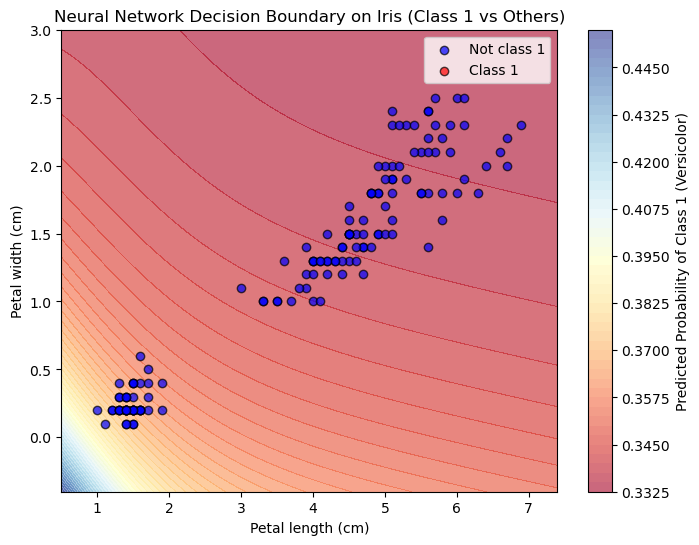

In [16]:
#thank you copilot

# --- Select two features for visualization ---
# (Iris features: 0=sepal length, 1=sepal width, 2=petal length, 3=petal width)
X_vis = X[2:4, :]   # take petal length & width
y_vis = y

# --- Function to forward pass through trained network ---
def forward_pass(X_input):
    """Run trained model forward on any input"""
    z1 = w1 @ X_input + b1
    a1 = tanh_function(z1)
    z2 = w2 @ a1 + b2
    a2 = sigmoid_function(z2)
    return a2

# --- Create a meshgrid across feature space ---
x_min, x_max = X_vis[0, :].min() - 0.5, X_vis[0, :].max() + 0.5
y_min, y_max = X_vis[1, :].min() - 0.5, X_vis[1, :].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# --- Predict for every point in the grid ---
grid_points = np.vstack((xx.ravel(), yy.ravel()))

# Pad to 4D input because network expects 4 features (others=0)
X_grid = np.zeros((4, grid_points.shape[1]))
X_grid[2:4, :] = grid_points  # fill only the 2 visualized features

Z = forward_pass(X_grid)
Z = Z.reshape(xx.shape)

# --- Plot the decision boundary and training points ---
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, levels=50, cmap="RdYlBu", alpha=0.6)
plt.colorbar(label="Predicted Probability of Class 1 (Versicolor)")

# Overlay the true training points
plt.scatter(X_vis[0, y_vis[0] == 0], X_vis[1, y_vis[0] == 0],
            color="blue", edgecolor="k", label="Not class 1", alpha=0.7)
plt.scatter(X_vis[0, y_vis[0] == 1], X_vis[1, y_vis[0] == 1],
            color="red", edgecolor="k", label="Class 1", alpha=0.7)

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Neural Network Decision Boundary on Iris (Class 1 vs Others)")
plt.legend()
plt.show()
